# Problem Statement
# A bike-sharing system is a service in which bikes are made available for 
# shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


# A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the
# ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 
# So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Step 1 Reading undersating and visualizing the data

In [2]:
dfa=pd.read_csv('day.csv')
dfa.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
dfa.shape

(730, 16)

In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
dfa.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### In df  'instant' 'dteday' are of not much usage and  'causal' and 'registered' are highly depndable on cnt so we will be droping these four varibale

In [6]:
dfa=dfa.drop(['instant','dteday','casual','registered'],axis=1)
dfa.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
dfa.shape

(730, 12)

### Now visualazing the  numerical data 

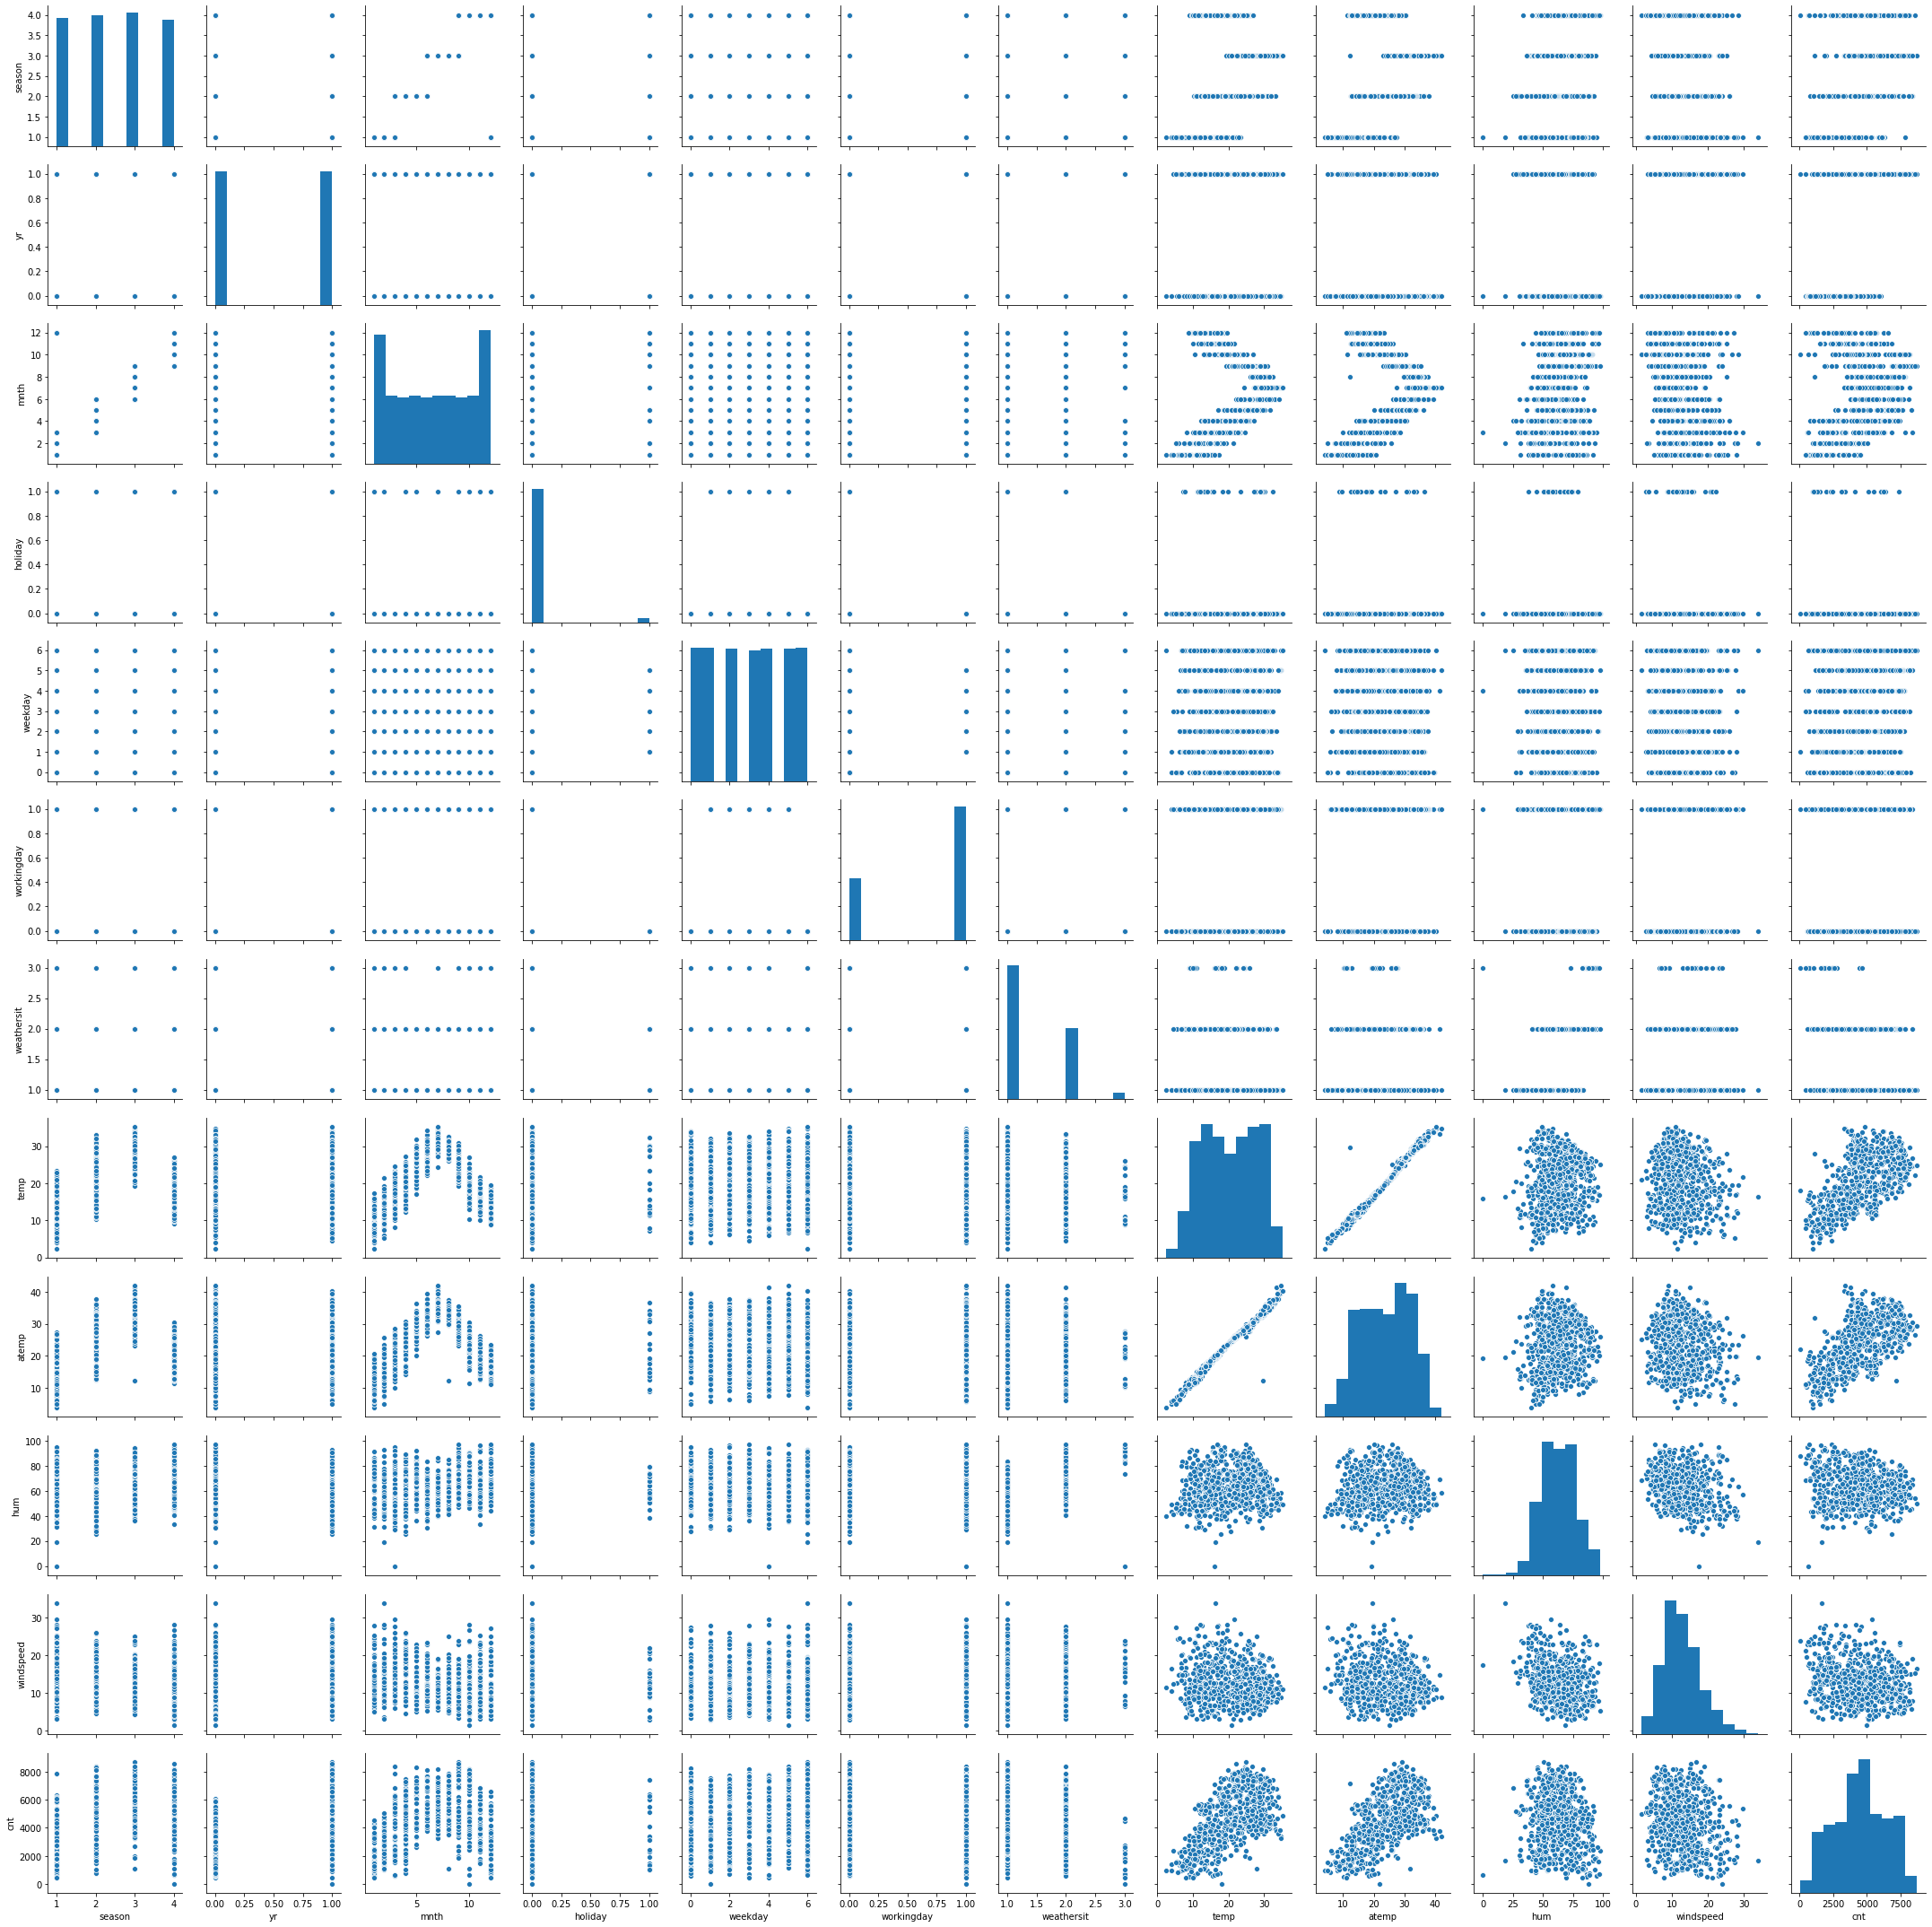

In [8]:
sns.pairplot(dfa)
plt.show()

### for more clarity to visualzing the numerical data

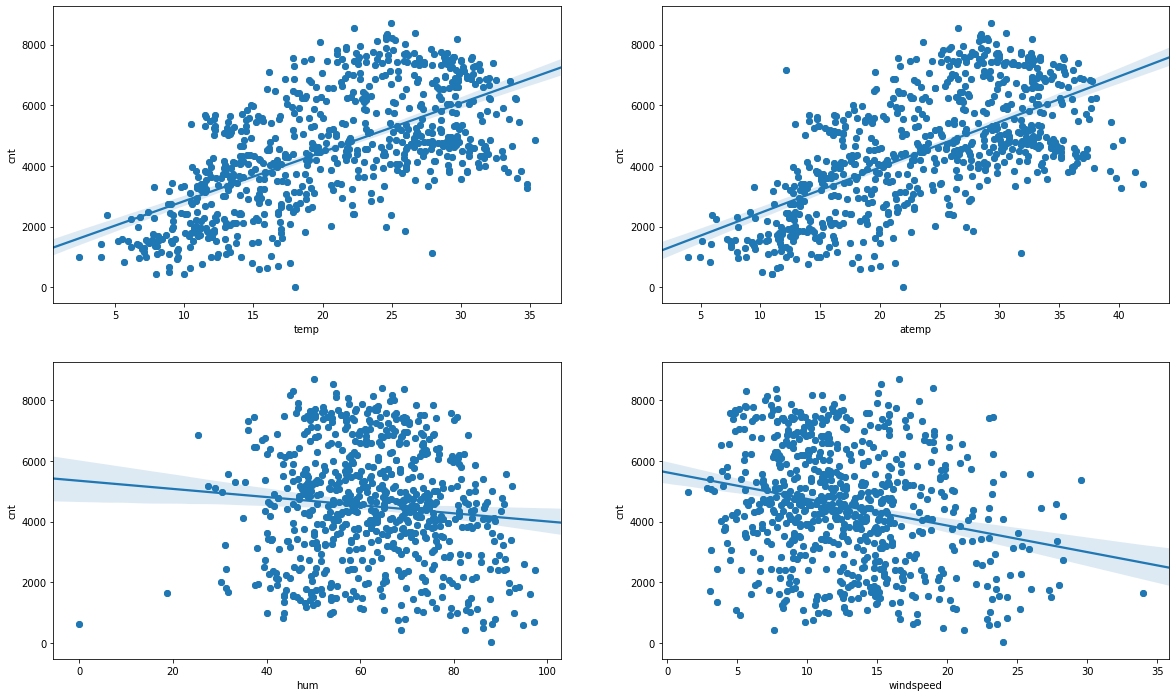

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(x='temp',y='cnt',data=dfa)
sns.regplot(x='temp',y='cnt',data=dfa)
plt.subplot(2,2,2)
plt.scatter(x='atemp',y='cnt',data=dfa)
sns.regplot(x='atemp',y='cnt',data=dfa)
plt.subplot(2,2,3)
plt.scatter(x='hum',y='cnt',data=dfa)
sns.regplot(x='hum',y='cnt',data=dfa)
plt.subplot(2,2,4)
plt.scatter(x='windspeed',y='cnt',data=dfa)
sns.regplot(x='windspeed',y='cnt',data=dfa)
plt.show()

### Visualzing the categorical data

In [10]:
dfa.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


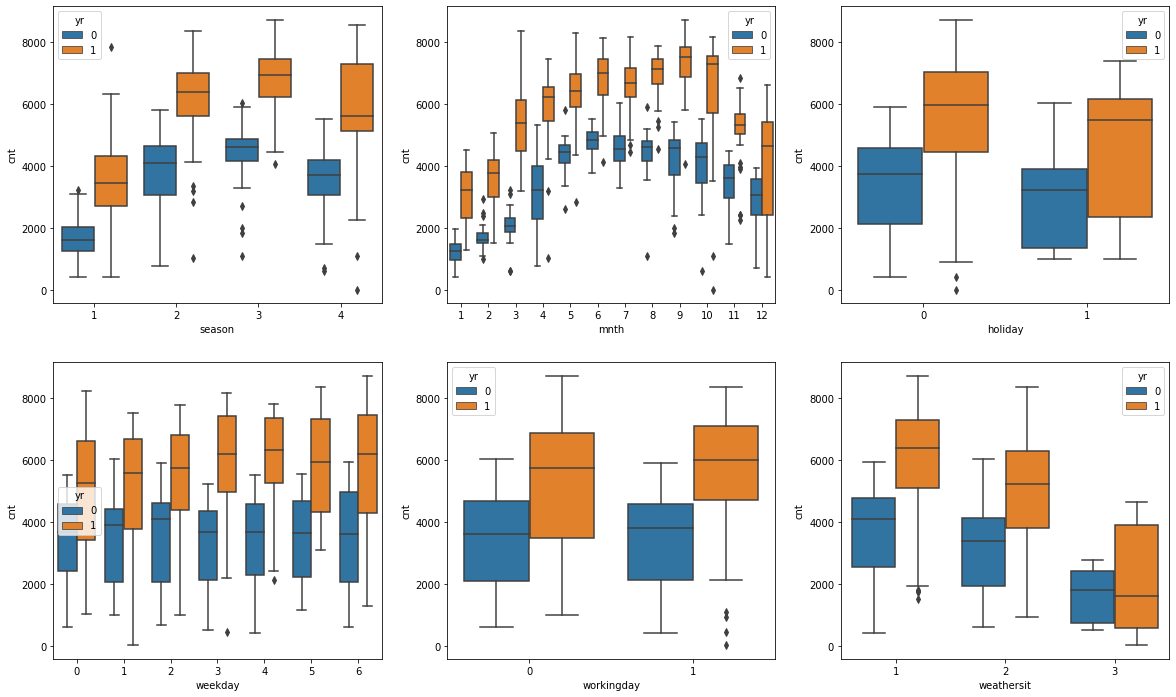

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',hue=dfa.yr,data=dfa)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',hue=dfa.yr,data=dfa)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',hue=dfa.yr,data=dfa)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',hue=dfa.yr,data=dfa)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',hue=dfa.yr,data=dfa)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',hue=dfa.yr,data=dfa)
plt.show()


### Very important to check how co linar the varibles are as follow

In [12]:
dfa.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


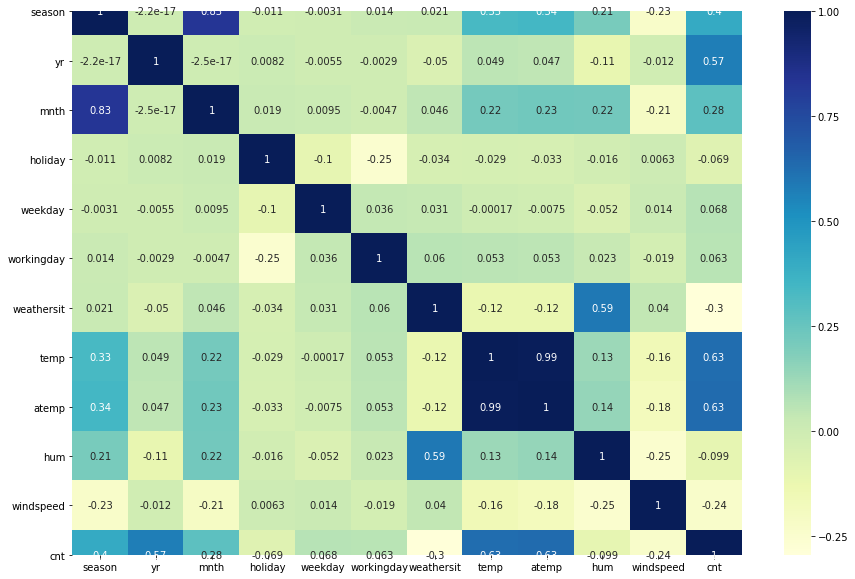

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(dfa.corr(),annot=True,cmap="YlGnBu")
plt.show()

### from the above heat map as well as regplot atemp amd temp are making same relation with cnt and their impact will be same on the model therefor the one of the varibele "atemp" will be droped

In [14]:
dfa=dfa.drop(['atemp'],axis=1)
dfa.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Step 2 Preparing the data for modelling

In [15]:
dfa['season']=dfa.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
dfa['mnth']=dfa.mnth.map({1:"jan",2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"})
dfa['weekday']=dfa.weekday.map({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"})
dfa['weathersit']=dfa.weathersit.map({1:"weather1",2:"weather2",3:"weather3",4:"weather4"})

In [16]:
dfa.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,weather2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,weather2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,weather1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600


### Creating dummy varibale and concatinating the same in main data set dfa

In [18]:
sean=pd.get_dummies(dfa['season'],drop_first=True)
sean.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
##concat the dummy sean with the original dfa
dfa=pd.concat([dfa,sean],axis=1)
dfa.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,saturday,0,weather2,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sunday,0,weather2,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,monday,1,weather1,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600,1,0,0


In [20]:
dfa=dfa.drop('season',axis=1)
dfa.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,saturday,0,weather2,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sunday,0,weather2,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,monday,1,weather1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600,1,0,0


In [21]:
month=pd.get_dummies(dfa['mnth'],drop_first=True)
month.head()

,aug,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
dfa=pd.concat([dfa,month],axis=1)
dfa.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,jan,0,saturday,0,weather2,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,sunday,0,weather2,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,monday,1,weather1,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [23]:
dfa=dfa.drop('mnth',axis=1)
dfa.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,saturday,0,weather2,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,weather2,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,weather1,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [24]:
week=pd.get_dummies(dfa['weekday'],drop_first=True)
week.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [25]:
dfa=pd.concat([dfa,week],axis=1)
dfa.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,saturday,0,weather2,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sunday,0,weather2,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,monday,1,weather1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tuesday,1,weather1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wednesday,1,weather1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
dfa=dfa.drop('weekday',axis=1)
dfa.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,weather2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,weather2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,weather1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,weather1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,weather1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
weather=pd.get_dummies(dfa['weathersit'],drop_first=True)
weather.head()

,weather2,weather3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [28]:
dfa=pd.concat([dfa,weather],axis=1)
dfa.head()


,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
0,0,0,0,weather2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,weather2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,weather1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,weather1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,weather1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
dfa=dfa.drop('weathersit',axis=1)
dfa.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Spliting the data into train and test

In [30]:
boom_train,boom_test=train_test_split(dfa,train_size=.7,random_state=100)
print(boom_train.shape)
print(boom_test.shape)

(510, 29)
(220, 29)


### rescalling the variables using normalization


In [31]:
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']

##.fit on data
boom_train[num_vars]=scaler.fit_transform(boom_train[num_vars])
boom_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
###to check max min varibale is working correctly

boom_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3 training the model

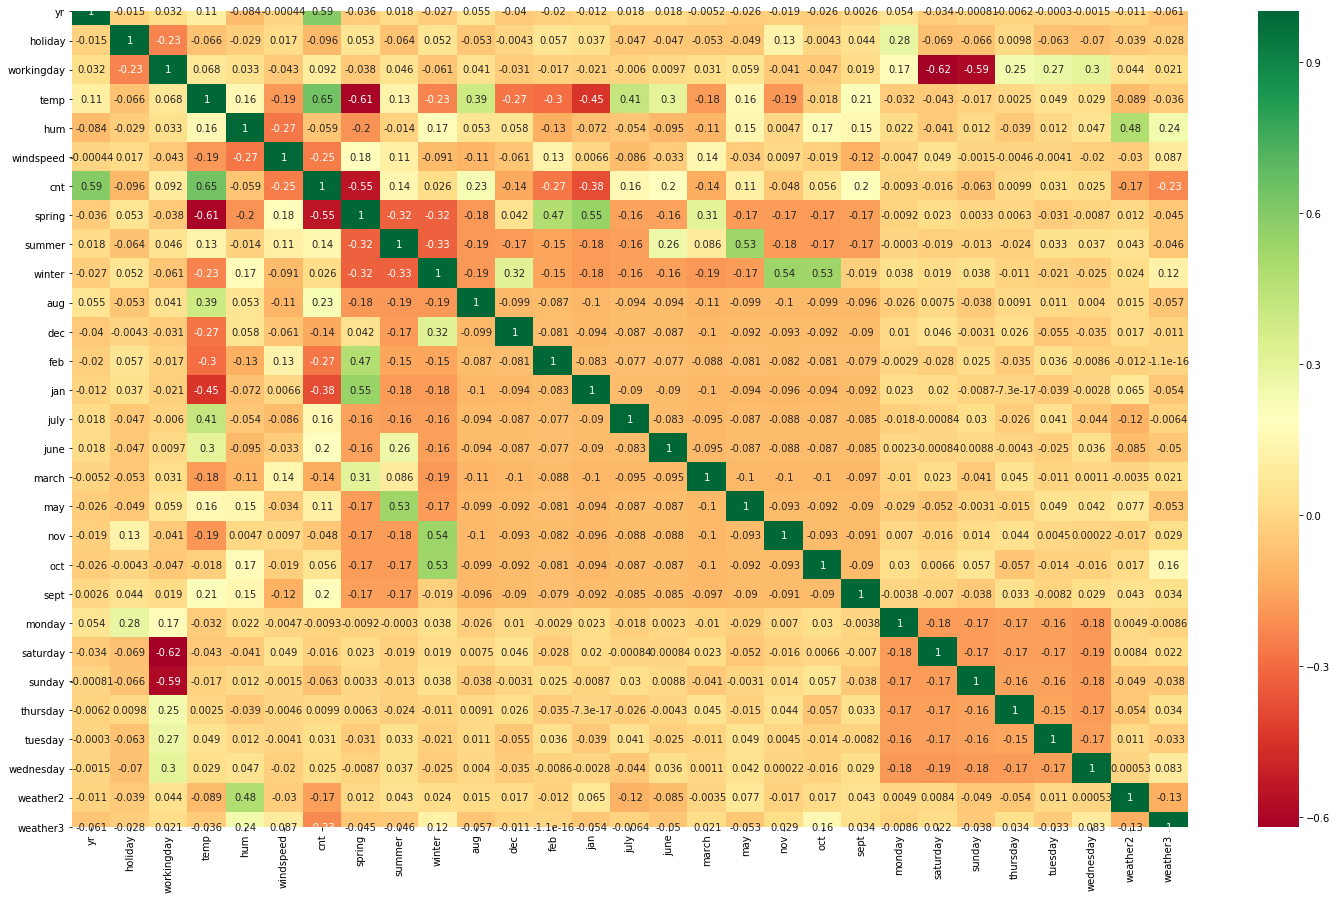

In [33]:
plt.figure(figsize=(25,15))
sns.heatmap(boom_train.corr(),annot=True,cmap="RdYlGn")
plt.show()

### Dividing into X and y set for the model building

In [34]:

y_train=boom_train.pop('cnt')
X_train=boom_train

In [35]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Will use RFE 

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
## Running RFE with the output no. of variable = 15
lm=LinearRegression()
lm.fit(X_train,y_train) # in this step we are fitting linear regression to the train data set
rfe=RFE(lm,15) # in this step we are running RFE to lm
rfe=rfe.fit(X_train,y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sept', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 7),
 ('thursday', False, 10),
 ('tuesday', False, 9),
 ('wednesday', False, 11),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [40]:
#RFE has selected these top 15 variables
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'july', 'sept', 'saturday', 'weather2',
       'weather3'],
      dtype='object')

In [41]:
# REF has not selected the below mention variable
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'june', 'march', 'may', 'nov', 'oct', 'monday',
       'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [42]:
# Creating X_train data frame for which REF has chossen the variable
X_train_rfe=X_train[col]

In [43]:
#Addding constant variuable
X_train_rfe=sm.add_constant(X_train_rfe)


In [44]:
#Running linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [45]:
lm.params

const         0.251893
yr            0.230527
holiday      -0.058173
workingday    0.043335
temp          0.509619
hum          -0.156299
windspeed    -0.186259
spring       -0.050897
summer        0.050762
winter        0.093301
jan          -0.034512
july         -0.052918
sept          0.081395
saturday      0.053552
weather2     -0.056318
weather3     -0.247464
dtype: float64

In [46]:
# to check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        21:06:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sept           0.0814      0.016      4.945      0.000       0.049       0.114
saturday       0.0536      0.014      3.694      0.000       0.025       0.082
weather2      -0.0563      0.010     -5.439      0.000      -0.077      -0.036
weather3      -0.2475      0.026     -9.507      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# We will also see the VIF value 

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,84.60
7,spring,5.08
4,temp,3.89
9,winter,3.59
8,summer,2.65
5,hum,1.91
3,workingday,1.88
13,saturday,1.78
10,jan,1.57
14,weather2,1.57


### From the above analysis of the P value and VIF no variable is having low P value of below 0.05 but on the other hand one varibale is having high VIF of above 5 
### Will elimiante the variable having high VIF and move further analysis

In [48]:
## Eliminating "spring" varibale as it is having high VIF
X_train_rfe=X_train_rfe.drop('spring',axis=1)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,jan,july,sept,saturday,weather2,weather3
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [49]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          5.98e-191
Time:                        21:06:25   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.030      6.739      0.000       0.142       0.260
yr             0.2294      0.008     28.555      0.000       0.214       0.245
holiday       -0.0596      0.027     -2.206      0.028      -0.113      -0.007
workingday     0.0437      0.012      3.774      0.000       0.021       0.066
temp           0.5676      0.025     22.556      0.000       0.518       0.617
hum           -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed     -0.1935      0.025     -7.606      0.000      -0.243      -0.144
summer         0.0757      0.011      6.950      0.000       0.054       0.097
winter         0.1255      0.011     11.081      0.000       0.103       0.148
jan           -0.0393      0.017     -2.271      0.024      -0.073      -0.005
july          -0.0442      0.018     -2.486      0.013      -0.079      -0.009
sept           0.0928      0.016      5.847      0.000       0.062       0.124
saturday       0.0539      0.015      3.696      0.000       0.025       0.082
weather2      -0.0541      0.010     -5.221      0.000      -0.075      -0.034
weather3      -0.2433      0.026     -9.320      0.000      -0.295      -0.192
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
12,saturday,1.78
13,weather2,1.56
9,jan,1.55
8,winter,1.53
10,july,1.43
7,summer,1.41


### Now we can see that VIF are low we will check on the P value and do the elemination

In [51]:
## eliminating 'holiday' varibale as it is having high P value among all the current variable
X_train_rfe=X_train_rfe.drop('holiday',axis=1)
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,jan,july,sept,saturday,weather2,weather3
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,1,0
111,1.0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [52]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.53e-191
Time:                        21:06:26   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1907      0.030      6.447      0.000       0.133       0.249
yr             0.2296      0.008     28.473      0.000       0.214       0.245
workingday     0.0526      0.011      4.824      0.000       0.031       0.074
temp           0.5684      0.025     22.506      0.000       0.519       0.618
hum           -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed     -0.1943      0.026     -7.609      0.000      -0.244      -0.144
summer         0.0765      0.011      6.997      0.000       0.055       0.098
winter         0.1251      0.011     11.000      0.000       0.103       0.147
jan           -0.0401      0.017     -2.306      0.022      -0.074      -0.006
july          -0.0429      0.018     -2.402      0.017      -0.078      -0.008
sept           0.0909      0.016      5.715      0.000       0.060       0.122
saturday       0.0629      0.014      4.476      0.000       0.035       0.090
weather2      -0.0538      0.010     -5.172      0.000      -0.074      -0.033
weather3      -0.2425      0.026     -9.253      0.000      -0.294      -0.191
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,55.65
3,temp,2.07
4,hum,1.89
2,workingday,1.65
11,saturday,1.64
12,weather2,1.56
8,jan,1.55
7,winter,1.53
9,july,1.43
6,summer,1.41


In [54]:
## eliminating 'jan' varibale as it is having high P value among all the current variable
X_train_rfe=X_train_rfe.drop('jan',axis=1)
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,july,sept,saturday,weather2,weather3
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,1,1,0
111,1.0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,1,0


In [55]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.14e-191
Time:                        21:06:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.000       0.115       0.227
yr             0.2286      0.008     28.267      0.000       0.213       0.244
workingday     0.0524      0.011      4.791      0.000       0.031       0.074
temp           0.5960      0.022     26.667      0.000       0.552       0.640
hum           -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
summer         0.0827      0.011      7.770      0.000       0.062       0.104
winter         0.1355      0.010     12.930      0.000       0.115       0.156
july          -0.0439      0.018     -2.450      0.015      -0.079      -0.009
sept           0.0928      0.016      5.816      0.000       0.061       0.124
saturday       0.0625      0.014      4.429      0.000       0.035       0.090
weather2      -0.0536      0.010     -5.129      0.000      -0.074      -0.033
weather3      -0.2391      0.026     -9.100      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,saturday,1.64
3,temp,1.60
11,weather2,1.56
8,july,1.43
6,summer,1.33
7,winter,1.29
12,weather3,1.24


In [57]:
## eliminating 'july' varibale as it is having high P value among all the current variable
X_train_rfe=X_train_rfe.drop('july',axis=1)
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,sept,saturday,weather2,weather3
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,1,0
111,1.0,0,1,0.345824,0.751824,0.380981,1,0,0,0,1,0


In [58]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          5.10e-191
Time:                        21:06:26   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.029      5.960      0.000       0.114       0.227
yr             0.2294      0.008     28.258      0.000       0.213       0.245
workingday     0.0533      0.011      4.849      0.000       0.032       0.075
temp           0.5710      0.020     28.558      0.000       0.532       0.610
hum           -0.1629      0.038     -4.340      0.000      -0.237      -0.089
windspeed     -0.1864      0.026     -7.268      0.000      -0.237      -0.136
summer         0.0910      0.010      8.984      0.000       0.071       0.111
winter         0.1396      0.010     13.430      0.000       0.119       0.160
sept           0.1027      0.016      6.619      0.000       0.072       0.133
saturday       0.0628      0.014      4.433      0.000       0.035       0.091
weather2      -0.0538      0.011     -5.124      0.000      -0.074      -0.033
weather3      -0.2426      0.026     -9.197      0.000      -0.294      -0.191
==============================================================================
Omnibus:                       72.400   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.721
Skew:                          -0.755   Prob(JB):                     1.03e-36
Kurtosis:                       5.349   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
9,saturday,1.64
10,weather2,1.56
3,temp,1.27
7,winter,1.25
11,weather3,1.24
6,summer,1.19
5,windspeed,1.18


# Step 4: Residual analysis of the train data
### THis is to check that the errors are normaly distributed

In [60]:
y_train_cnt=lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

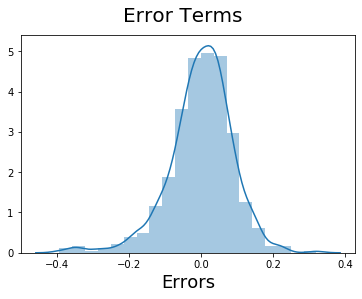

In [61]:
fig=plt.figure()
sns.distplot(y_train-y_train_cnt,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)


# Step 5 Predection and evalution on the test data set

In [62]:

boom_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:

num_vars=['temp','hum','windspeed','cnt']

##.fit on data
boom_test[num_vars]=scaler.transform(boom_test[num_vars])
boom_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
boom_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
## In the Y test set we have to pop out cnt as it is the dependent variable
y_test=boom_test.pop('cnt')
X_test=boom_test

In [66]:
## We have to add constant or the intercept same as we have done to the train  set
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,weather2,weather3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Below mention step is one of the most important sub step as we have to check and keep only those variable which are there is final train set


In [73]:


X_test_sms=X_test_sm.drop(['aug', 'dec', 'feb', 'june', 'march', 'may', 'nov', 'oct', 'monday',
       'sunday', 'thursday', 'tuesday', 'wednesday','spring','holiday','jan','july'],axis=1)
X_test_sms.head()

#predict
y_test_pred=lm.predict(X_test_sms)

In [72]:
### evaluate 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.806578880340808

## The equation for  best fitted line is as follow:

### cnt= 0.2294*yr  +  0.0553*workingday  +  0.5710*temp  -  0.1629*hum  -  0.1864*windspeed +  0.0910*summer + 0.1396*winter  +  0.1027*sept  +  0.0628*saturday -  0.0538*weather2 -  0.2426* weather3 +  0.1707(constatnt)
